In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Stage : plans PIV
"""
DataFolder="C:/Users/Julie_000/Desktop/Stage" 

# Données expérimentales by Clément

In [6]:
# Importation des librairies
from mat4py import loadmat #pour charger des .mat
import matplotlib.pyplot as plt # pour tracer les figures
plt.rcParams['figure.figsize'] = [8, 4.5] # taille par dÃ©faut des figures qu'on trace
import os # pour modifier le dossier de travail
import numpy as np # pour travailler avec des array
from pathlib import Path # Pour rendre les Path compatibles entre Mac et Windows
from matplotlib import rc #Les trois prochaines lignes pour que Ã§a ressemble Ã  latex
rc('font', size=16)
rc('text', usetex=True)
import sys
import matplotlib.cm as cm #colormaps
from matplotlib.colors import Normalize #Pour l'utilisation des couleurs dans quiver
import scipy as sc #pour l'analyse

## Définition des fonctions

In [3]:
# Definition des fonctions
def PIV(prof,manips): 
    """retourne les données des plans pour la bonne profondeur"""
    
    if prof==5:
        piv=manips['piv5']
    elif prof==10:
        piv=manips['piv10']
    elif prof==15:
        piv=manips['piv15']
    else:
        return("prof n'a pas une valeur acceptable")   
    return(piv)

def donnees(prof,plan,manips):
    """Retourne les tableaux de données pour le plan choisi de la profondeur donnée"""
    
    piv=PIV(prof,manips)
    u=np.array(piv[plan]['u'])
    v=np.array(piv[plan]['v'])
    x=np.array(piv[plan]['x'])
    y=np.array(piv[plan]['y'])
    return(u,v,x,y)

## Chargement des données

In [45]:
# Chargement des données:
os.chdir(Path(DataFolder)) # se place dans le dossier où est rangée la manip
manips=loadmat('PIVnagseul.mat') # Charge les données dans la variable manip

prof=10 # Choisi sur quelle profondeur d'eau travailler (5, 10 ou 15 mm)
plan=4
    
u,v,x,y=donnees(prof, plan, manips)

## Plot du champ de vitesse d'un plan choisi pour une profondeur donnée

C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Julie_000\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


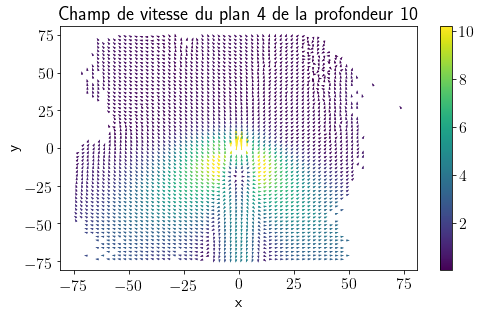

In [46]:
#Tracé du champ de vitesse pour la profondeur et le plan choisi

## Pour mieux les représenter, je bidouille la colormap
velocity=np.sqrt(u**2+v**2)
velmax=np.mean(velocity)+3*np.std(velocity)#norme maximale représentée sur la colormap borne sup arbitraire
colors = velocity
colors[velocity>velmax]=velmax
colormap=cm.viridis#colormap
norm = Normalize()
norm.autoscale(colors)
    
##plot    
plt.subplots() #pour pas que le plot soit remplacé à chaque fois
cb=plt.colorbar(plt.quiver(x,y,u/velocity,v/velocity,colors)) #pour la barre de couleur
plt.title("Champ de vitesse du plan {} de la profondeur {}".format(plan,prof))
plt.xlabel("x")
plt.ylabel("y")
plt.quiver(x,y,u/velocity,v/velocity,colors)#quiver pour plotter des champs de vecteurs

# Calcul de la divergence bidimensionnelle

## Tentative naïve : différencier sans lisser

### Définition des fonctions


In [40]:
#Définition des fonctions

def deriv(y,x,axis):
    """Dérive un tableau par rapport à un axe donné"""
    d_axe0=np.diff(y,axis=0)/np.diff(x,axis=0)
    d_axe1=np.diff(y,axis=1)/np.diff(x,axis=1)
    return()

def abcisse(x):#J'ai arrangé mes problèmes d'axe mais je ne suis pas certaine de la légalité du procédé...
    """somme discrète x[i+1]+x[i]/2"""
        return((x[1:,1:]+x[:-1,:-1])/2)

In [29]:
np.shape(x)

(60, 60)

### chargement des tableaux

In [41]:
du,dv=deriv(u,x,1),deriv(v,y,0)
dx,dy=abcisse(x,1),abcisse(y,0)


### plot

In [44]:
## Bidouillage colormap
dvelocity=np.sqrt(du**2+dv**2)
dvelmax=np.mean(dvelocity)+3*np.std(dvelocity)#norme maximale représentée sur la colormap borne sup arbitraire
colors = dvelocity
colors[dvelocity>dvelmax]=dvelmax
colormap=cm.viridis#colormap
norm = Normalize()
norm.autoscale(colors)
    
##plot    
plt.subplots() #pour pas que le plot soit remplacé à chaque fois
cb=plt.colorbar(plt.quiver(dx,dy,du/dvelocity,dv/dvelocity,colors)) #pour la barre de couleur
plt.title(Gradient)
plt.xlabel("x")
plt.ylabel("y")
plt.quiver(dx,dy,du/dvelocity,dv/dvelocity,colors)#quiver pour plotter des champs de vecteurs

ValueError: operands could not be broadcast together with shapes (60,59) (59,60) 